# Complejidad de algoritmos. Introducción experimental

Dos programas resuelven la misma tarea. ¿Es mejor uno que otro? Atendiendo al tiempo y la memoria que consumen, un mismo programa tendrá un comportamiento distinto con cada juego de datos; y también en cada equipo en el que se ejecute; incluso en cada lenguaje de programación. Así, ¿cómo podemos adoptar un criterio general para compararlos?

Los siguientes ejemplos siguen el capítulo 2 de "Problem Solving with Algorithms and Data Structures using Python", de Ranum y Miller (2013). Repásalos leyendo el texto de ese libro.

## What is Algorithm Analysis?

In [1]:
def sum_of_n(n):
    the_sum = 0
    for i in range(1,n+1):
        the_sum = the_sum + i
    return the_sum

print(sum_of_n(10))

55


In [2]:
def foo(tom):
    fred = 0
    for bill in range(1, tom+1):
        barney = bill
        fred = fred + barney
    return fred

print(foo(10))

55


- Atendiendo a la legibilidad, ¿cuál es mejor?
- Si cada suma y cada asignación cuentan como un paso, ¿Cuántos pasos requiere cada algoritmo aplicado al parámetro 20?
¿Y a 30, 40...?
¿Puedes dar una fórmula para el número de pasos que necesita cada función?
- Si consideramos que cada parámetro y cada variable entera ocupan una celda de memoria,
¿Cuál es el espacio empleado por cada una de las dos funciones?

In [3]:
def sum_of_n_count_steps(n):
    num_steps = 0
    the_sum = 0
    num_steps = num_steps + 1
    for i in range(1,n+1):
        the_sum = the_sum + i
        num_steps = num_steps + 1
    return the_sum, num_steps

print(10, sum_of_n_count_steps(10))
print([(i, sum_of_n_count_steps(i)) for i in range(10)])

10 (55, 11)
[(0, (0, 1)), (1, (1, 2)), (2, (3, 3)), (3, (6, 4)), (4, (10, 5)), (5, (15, 6)), (6, (21, 7)), (7, (28, 8)), (8, (36, 9)), (9, (45, 10))]


Para cada input, hemos calculado su output y el número de pasos. Pero hemos tenido que alterar la función, haciéndola menos legible. Además, tenemos números concretos pero no una expresión general y clara del número de pasos.

Otra idea: cronometrar el tiempo que tarda una ejecución: 

In [4]:
import time

for i in range(1, 10):
    n = i*10000
    start = time.time()
    sum_obtained = sum_of_n(n)
    end = time.time()
    time_used = end - start

    print("Sum 1 + ... + " + str(n) + " = " + str(sum_obtained) + ". Time: " + str(round(time_used, 5)))

Sum 1 + ... + 10000 = 50005000. Time: 0.002
Sum 1 + ... + 20000 = 200010000. Time: 0.01099
Sum 1 + ... + 30000 = 450015000. Time: 0.01999
Sum 1 + ... + 40000 = 800020000. Time: 0.01499
Sum 1 + ... + 50000 = 1250025000. Time: 0.03898
Sum 1 + ... + 60000 = 1800030000. Time: 0.04198
Sum 1 + ... + 70000 = 2450035000. Time: 0.02498
Sum 1 + ... + 80000 = 3200040000. Time: 0.01911
Sum 1 + ... + 90000 = 4050045000. Time: 0.03845


Es mucho más claro. Problemas: la medida del tiempo dará un resultado distinto en cada ordenador, e incluso en el mismo ordenador en cada ejecución hay ligeras variaciones.

Este último defecto se puede aminorar ejecutando cada ejemplar varias veces (por ejemplo, 100) y quedándonos con la media:

In [5]:
n = 40000 # por ejemplo

num_reps = 100
start = time.time()
for i in range(num_reps):
    sum_obtained = sum_of_n(n)
end = time.time()
time_used = (end - start)/num_reps
print("Sum 1 + ... + " + str(n) + " = " + str(sum_obtained) + ". Time: " + str(round(time_used, 5)))

Sum 1 + ... + 40000 = 800020000. Time: 0.01459


Todo esto se ve mucho más claro gráficamente:

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0.          0.01562262  0.          0.01562476  0.          0.0156002
  0.01561761  0.01562715  0.01564837  0.03124881  0.01560163  0.04686475
  0.04652834  0.03124928  0.03124762  0.03357005  0.04687691  0.03124285
  0.04689837  0.04684448]


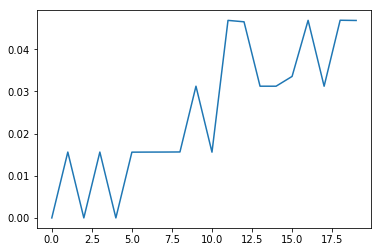

In [6]:
def take_time_my_fun(n):
    start = time.time()
    nn = sum_of_n(n*10000)
    end = time.time()
    return end - start

import matplotlib.pyplot as plt
import numpy as np

def graph(fun, x_range):
    y_range = map(fun, x_range)
    """http://stackoverflow.com/questions/14000595/graphing-an-equation-with-matplotlib"""
    x = np.array(x_range)  
    y = np.array(list(y_range))
    print(x)
    print(y)
    plt.plot(x, y)  
    plt.show()  

graph(take_time_my_fun, range(20))

Se ven claramente las irregularidades de cada ejecución. La solución es repetir cada ejecución un cierto número de veces y tomar el tiempo medio:

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0.          0.00379727  0.00969443  0.0073384   0.01002271  0.01093709
  0.01510658  0.01562693  0.02030885  0.02187309  0.0234355   0.03003018
  0.03199348  0.03194177  0.03431773  0.03593776  0.0406194   0.04981625
  0.04530916  0.04862902]


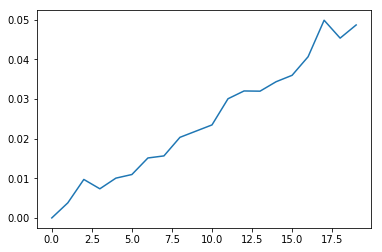

In [7]:
def take_time_my_fun_avg(n):
    k = 10 # num repetitions
    start = time.time()
    for i in range(k):
        nn = sum_of_n(n*10000)
    end = time.time()
    return (end - start) / k

graph(take_time_my_fun_avg, range(20))

En resumen, se suavizan las irregularidades y vemos que el tiempo crece linealmente con respecto al tamaño del argumento proporcionado:

$$t_{sum\_of\_n}(n) = k \cdot n$$

para alguna constante $k$, que no nos importa ahora.

Dos asuntos nos preocupan:

- Adquirir conciencia de la complejidad de los algoritmos y calcular su eficiencia con la precisión que sea posible 
- Encontrar algoritmos más eficientes, constatando la ganancia en términos de las funciones de coste.

El algorimto siguiente resuelve el mismo problema de calcular $\sum_{i=1}^{n} i$, y es más eficiente:

In [8]:
def sum_of_n_3(n):
    return (n * (n + 1)) // 2

print(sum_of_n_3(10))

55


- Calcula los recursos (tiempo y espacio de memoria) empleados por esta función con los mismos criterios usados con las otras versiones, para los datos 10, 20, 30... y en general.

- El siguiente programa no hace realmente nada interesante. Pero nosotros atendemos a su eficiencia, y no a su cometido ni al resultado. Variando los valores de *n*, calcula el tiempo y el espacio requeridos. Emplea la notación con sumatorio cuando lo necesites.

In [9]:
a = 5
b = 6
n = 10
for i in range(n):
    for j in range(n):
        x = i * i
        y = j * j
        z = i * j
for k in range(n):
    w = a * k + 45
    v = b * b
d = 33

## An Anagram Detection Example

Deseamos saber si dos cadenas de caracteres contienen las mismas letras aunque en un orden posiblemente distinto. Presentamos seguidamente distintos algoritmos posibles para este problema. Tu trabajo consiste en (a) entender cómo opera cada uno de ellos (sugerencia: ejecútalos a mano, como si fueras tú el ordenador que realiza las instrucciones indicadas en Python); y (b) reflexionar sobre el tiempo que lleva.

In [10]:
# Solution 1: Checking Off

def anagram_solution1(s1,s2):
    # Pre: len(s1) == len(s2)
    a_list = list(s2)
    pos1 = 0
    still_ok = True
    while pos1 < len(s1) and still_ok:
        pos2 = 0
        found = False
        while pos2 < len(a_list) and not found:
            if s1[pos1] == a_list[pos2]:
                found = True
            else:
                pos2 = pos2 + 1
        if found:
            a_list[pos2] = None
        else:
            still_ok = False
        pos1 = pos1 + 1
    return still_ok

print(anagram_solution1('abcd','dcba'))

True


- Calcula el coste (número de operaciones) y exprésalo mediante una función, dependiente de la longitud *n* del primer *string*, *s1*.
- Simplificamos un poco: una instrucción, o dos o tres (finitamente) cuentan como un paso, y a este coste le llamamos *constante*. Si tenemos una instrucción simple (coste constante) + un bucle (coste mayor posiblemente, o igual, al menos), basta con tener en cuenta el bucle. Simplifica en lo posible la solución anterior.

In [11]:
# Solution 2: Sort and Compare

def anagram_solution2(s1,s2):
    # Pre: len(s1) == len(s2)
    a_list1 = list(s1)
    a_list2 = list(s2)
    a_list1.sort()
    a_list2.sort()
    pos = 0
    matches = True
    while pos < len(s1) and matches:
        if a_list1[pos] == a_list2[pos]:
            pos = pos + 1
        else:
            matches = False
    return matches

print(anagram_solution2('abcde','edcba'))

True


La instrucción *sort* no puede considerarse de un paso; de hecho, según el algoritmo empleado, será típicamente la siguiente:
*t<sub>sort</sub>(n) = n<sup>2</sup>* o *t<sub>sort</sub>(n) = n log n*.

- Teniendo en cuenta ambas posibilidades, calcula la complejidad del algoritmo anterior.

En la solución siguiente, el primer paso es entender el algoritmo empleado. Invierte un tiempo en saber qué hace y cómo.

In [12]:
# Solution 3: Brute Force

def insertions(char, word):
    total = []
    length = len(word)
    for i in range(0,length+1):
        total.append(word[0:i] + char + word[i:length])       
    return total
                        
def permutations(word):
    if word == "":
        return [""]
    else:
        length = len(word)
        last   = word[length-1]
        front  = word[0:length-1]
        all_permutations = []
        for perm in permutations(front):
            for i in insertions(last, perm):
                all_permutations.append(i)
        return all_permutations

def are_anagrams(word1, word2):
    # Pre: len(s1) == len(s2)
    return word1 in permutations(word2)

print(are_anagrams("roma", "amor"))

True


Para entender la complejidad del algoritmo anterior, podemos ir por partes:
- ¿Cuántos pasos necesita la función insertions, dependiendo de la longitud del parámetro *word*?

- Etc.

Pero basta con saber la longitud de la lista calculada por *permutations* (aunque el coste puede ser aún mayor...)

In [13]:
# Sol 4: Count and Compare

def anagram_solution4(s1, s2):
    # Pre: len(s1) == len(s2)
    c1 = [0] * 26
    c2 = [0] * 26
    for i in range(len(s1)):
        pos = ord(s1[i]) - ord('a')
        c1[pos] = c1[pos] + 1
    for i in range(len(s2)):
        pos = ord(s2[i]) - ord('a')
        c2[pos] = c2[pos] + 1
    j = 0
    still_ok = True
    while j < 26 and still_ok:
        if c1[j] == c2[j]:
            j = j + 1
        else:
            still_ok = False
    return still_ok

print(anagram_solution4('apple','pleap'))

True


In [14]:
# Sol 4': Count and Compare, with a dictionary

def anagram_solution5(s1, s2):
    # Pre: len(s1) == len(s2)
    dict_1 = {}
    dict_2 = {}
    for i in s1:
        if i in dict_1:
            dict_1[i] = dict_1[i] + 1
        else:
            dict_1[i] = 0
    for i in s2:
        if i in dict_2:
            dict_2[i] = dict_2[i] + 1
        else:
            dict_2[i] = 0
    return dict_1 == dict_2

print(anagram_solution5('apple','pleap'))

True


## Self Check

Calcula la complejidad de cada uno de los siguientes algoritmos (Ranum and Miller, 2.2.4), y clasifícala según la siguiente escala:

<table>
  <tr>
    <td> O(1)       </td>
    <td> O(log n)   </td>
    <td> O(n)       </td>
    <td> O(n log n) </td>
    <td> O(n^2)     </td>
    <td> O(n^3)     </td>
    <td> Otra       </td>
  </tr>
</table>

In [15]:
# Q-1 ------------------------------

test = 0
for i in range(n):
    for j in range(n):
        test = test + i * j
print(test)

# Q-2 ------------------------------

test = 0
for i in range(n):
    test = test + 1
for j in range(n):
    test = test - 1
print(test)
    
# Q-3 ------------------------------

i = n
while i > 0:
    k = 2 + 2
    i = i // 2
print(test)

2025
0
0


Calcula la complejidad de cada uno de los siguientes algoritmos:

- Cálculo del factorial de un número entero positivo: $fact(n) = n!$.
- Cálculo de la función *muchos_fac(n) = [fac(i) for i in range(n+1)]*. Es decir:
<center>
  [0!, 1!, 2!, ..., n!]
</center>
- Busca la función más eficiente que puedas para este último cálculo, y halla su complejidad.